## 1. Import Libraries

In [33]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

### 1.1 Helper functions

#### For correlation between categorical features

In [83]:
def categorical_correlations(df, categorical_features, target):
    """
    Compute correlation metrics between categorical features and a target variable,
    and return results as a pandas DataFrame.

    Parameters:
    - df: Pandas DataFrame containing the dataset.
    - categorical_features: List of strings representing the names of categorical features.
    - target: Name of the column in df representing the target variable.

    Returns:
    - correlations_df: Pandas DataFrame where rows represent features, and columns are
                       correlation metrics ('p_value', 'cramers_score', 'mutual info').
    """
    # Initialize an empty list to collect dictionaries of metrics
    correlations = []

    for feature in categorical_features:
        # Compute correlation metrics for the current feature
        metrics = {
            'Feature': feature,
            'p_value': p_value(df, target, feature),
            'cramers_score': cramers_score(df, target, feature),
            'mutual info': mutual_info(df, target, feature)
        }
        # Append the metrics dictionary to the list
        correlations.append(metrics)

    # Convert the list of dictionaries to a DataFrame
    correlations_df = pd.DataFrame(correlations)

    return correlations_df

In [85]:
def p_value(df, target, feature):
    contingency_table = pd.crosstab(df[target], df[feature])

    # Perform the Chi-Square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    return p

In [84]:
def cramers_score(df, target, feature):
    contingency_table = pd.crosstab(df[target], df[feature])
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    return cramers_v

In [86]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

def mutual_info(df, target, feature):
    encoder_feature = LabelEncoder()
    encoded_feature = encoder_feature.fit_transform(df[target])

    encoder_target = LabelEncoder()
    encoded_target = encoder_target.fit_transform(df[feature])

    mi = mutual_info_classif(encoded_feature.reshape(-1, 1), encoded_target)

    return mi[0]

#### For plotting countplots (for categorical variables)

In [91]:
def cat_countplot(df, feature):
    plt.figure(figsize=(10, 7))
    sns.countplot(x=feature, data=df)
    plt.show()

## 2. Read Training and Test Data

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv', index_col='id')

In [3]:
features = list(test.columns)

In [4]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [31]:
train.shape, test.shape

((76518, 37), (51012, 36))

In [30]:
len(test) / (len(test) + len(train))

0.4

## Target Distribution

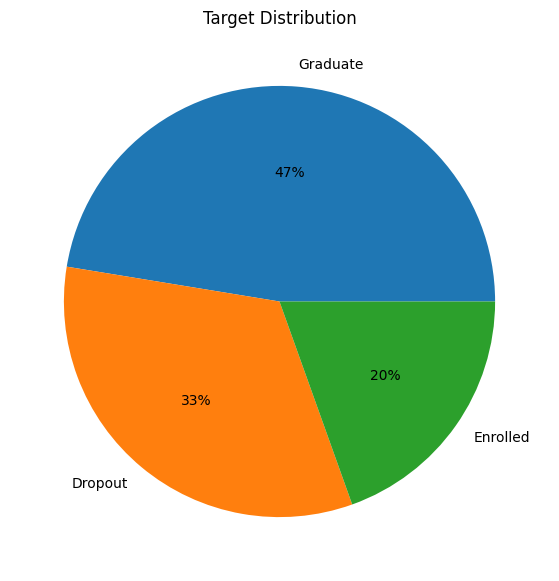

In [5]:
value_counts = train['Target'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(value_counts, labels=value_counts.index, autopct="%.0f%%")
plt.title('Target Distribution')
plt.show()

## Label Encode the Target Variables

In [6]:
label_encoder = LabelEncoder()
targets = label_encoder.fit_transform(train['Target'])

In [7]:
features

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

In [8]:
train['Marital status']

id
0        1
1        1
2        1
3        1
4        1
        ..
76513    1
76514    1
76515    5
76516    1
76517    1
Name: Marital status, Length: 76518, dtype: int64

In [9]:
categorical_features = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

for feature in categorical_features:
    data_type = pd.CategoricalDtype(categories=list(set(train[feature]) | set(test[feature])))
    for df in [train, test]:
        df[feature] = df[feature].astype(data_type)

In [10]:
train['Marital status']

id
0        1
1        1
2        1
3        1
4        1
        ..
76513    1
76514    1
76515    5
76516    1
76517    1
Name: Marital status, Length: 76518, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [11]:
train['Application order']

id
0        1
1        1
2        2
3        3
4        2
        ..
76513    1
76514    6
76515    1
76516    3
76517    1
Name: Application order, Length: 76518, dtype: int64

In [17]:
numeric_features = [feature for feature in features if feature not in categorical_features + ['Application order', "Mother's occupation", "Father's occupation"]]
numeric_features

['Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [19]:
categorical_features

['Marital status',
 'Application mode',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

## Let's study the categorical variables first

In [32]:
categorical_features

['Marital status',
 'Application mode',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

In [87]:
categorical_correlations(train, categorical_features + ['Application order', "Mother's occupation", "Father's occupation"], 'Target').sort_values(by='p_value')

,Feature,p_value,cramers_score,mutual info
0,Marital status,0.000000e+00,0.106280,0.017588
15,Application order,0.000000e+00,0.115709,0.016562
13,Scholarship holder,0.000000e+00,0.406397,0.095332
12,Gender,0.000000e+00,0.330197,0.059158
11,Tuition fees up to date,0.000000e+00,0.447177,0.113306
10,Debtor,0.000000e+00,0.258900,0.041951
16,Mother's occupation,0.000000e+00,0.171457,0.029811
8,Displaced,0.000000e+00,0.150753,0.015467
6,Mother's qualification,0.000000e+00,0.176522,0.032210
4,Previous qualification,0.000000e+00,0.191633,0.039582


'International' and 'Educational special needs' have p-values of 0.73 and 0.89!

In [88]:
categorical_correlations(train, categorical_features + ['Application order', "Mother's occupation", "Father's occupation"], 'Target').sort_values(by='cramers_score', 
                                                                                                                                                  ascending=False)

,Feature,p_value,cramers_score,mutual info
11,Tuition fees up to date,0.000000e+00,0.447177,0.110131
13,Scholarship holder,0.000000e+00,0.406397,0.095276
2,Course,0.000000e+00,0.336356,0.115380
12,Gender,0.000000e+00,0.330197,0.058807
1,Application mode,0.000000e+00,0.292509,0.087960
10,Debtor,0.000000e+00,0.258900,0.040583
4,Previous qualification,0.000000e+00,0.191633,0.040366
6,Mother's qualification,0.000000e+00,0.176522,0.030988
16,Mother's occupation,0.000000e+00,0.171457,0.027648
7,Father's qualification,0.000000e+00,0.170974,0.028315


'Nacionality', 'International', 'Education special needs' are again at the bottom

In [90]:
categorical_correlations(train, categorical_features + ['Application order', "Mother's occupation", "Father's occupation"], 'Target').sort_values(by='mutual info',
                                                                                                                                                  ascending=False)

,Feature,p_value,cramers_score,mutual info
2,Course,0.000000e+00,0.336356,0.118821
11,Tuition fees up to date,0.000000e+00,0.447177,0.110225
13,Scholarship holder,0.000000e+00,0.406397,0.093319
1,Application mode,0.000000e+00,0.292509,0.085504
12,Gender,0.000000e+00,0.330197,0.063427
4,Previous qualification,0.000000e+00,0.191633,0.042893
10,Debtor,0.000000e+00,0.258900,0.040843
16,Mother's occupation,0.000000e+00,0.171457,0.034506
6,Mother's qualification,0.000000e+00,0.176522,0.031602
7,Father's qualification,0.000000e+00,0.170974,0.029725


- Again the three culprits are at the bottom
- Course, Tuition Fees, Scholarship holder appear to be strong indicators

## 1. Marital status

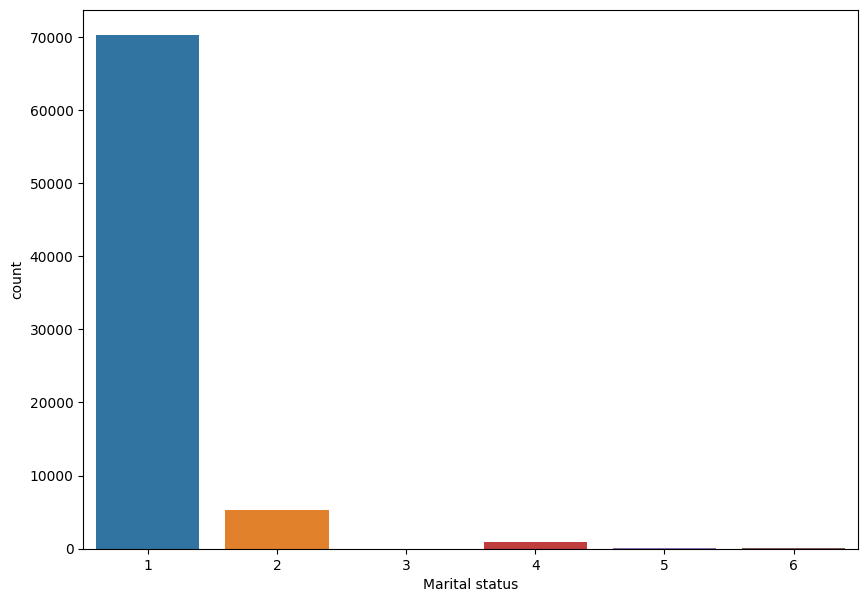

In [94]:
cat_countplot(train, 'Marital status')

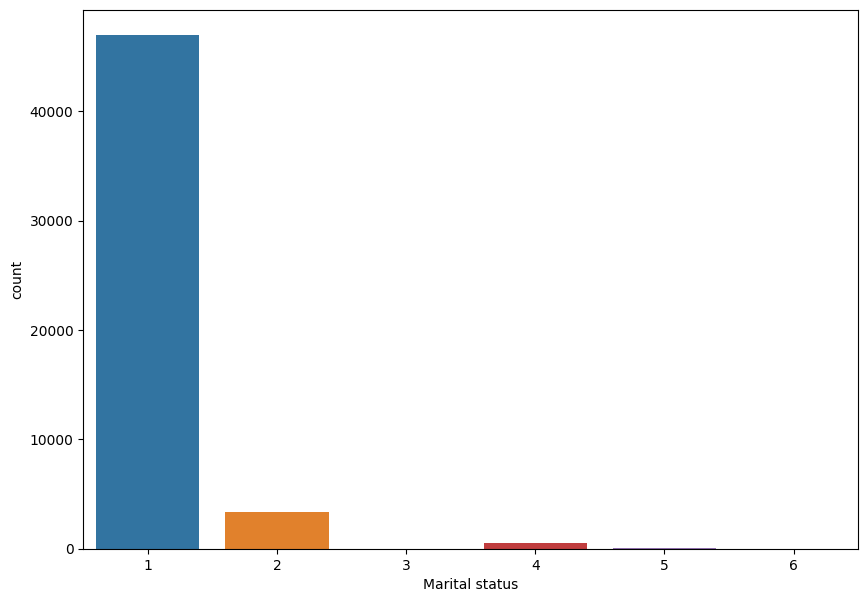

In [95]:
cat_countplot(test, 'Marital status')

### 2. Application mode

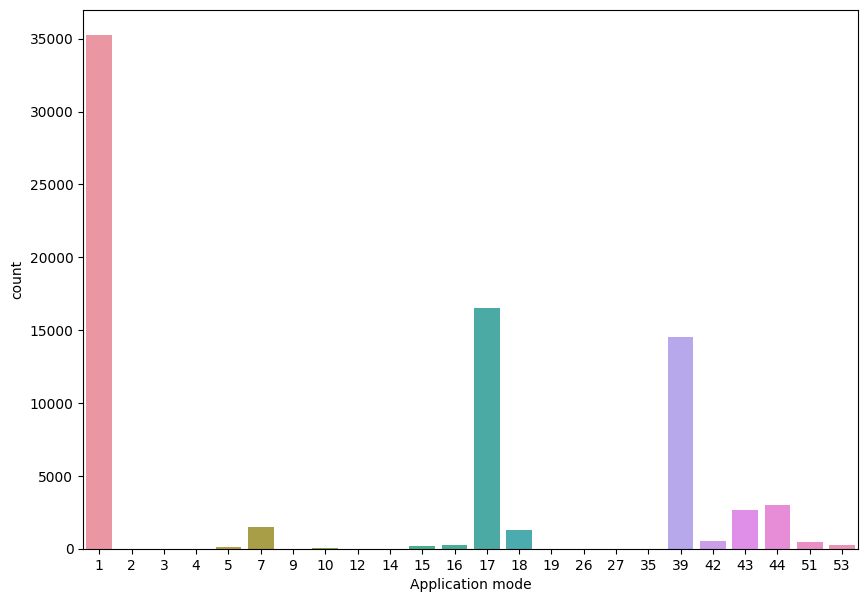

In [92]:
cat_countplot(train, 'Application mode')

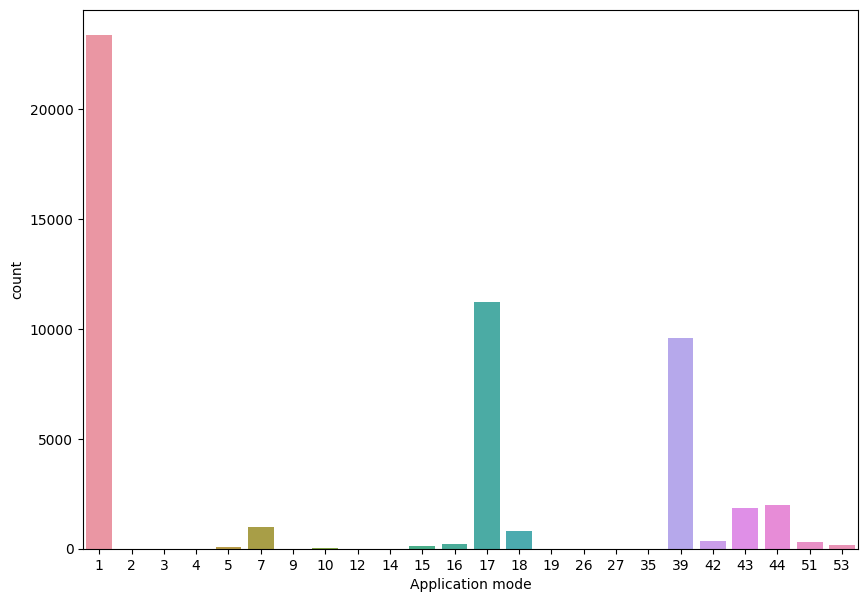

In [93]:
cat_countplot(test, 'Application mode')